## Dataset Story

Data has taken from drivenData.org, it was released as a part of their competition DengAI.
Dataset from the competition has 2 cities named Sanjuan and Iquitos.Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death. Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature,humidity and precipitation. An understanding of the relationship between climate and dengue dynamics can improve research initiatives and resource allocation to help fight life-threatening pandemics.

Our data contains Climatic information such as precipitation, temperature, humidity for each City and Satellite vegetation. And also, we have total cases of Dengue Affected Cases for the Corresponding Year and Week of the Year.


## Objectives(Task Definition)


1. To predict the number of dengue cases each week in each location based on environmental variables describing changes in temperature, precipitation and humidity.

 **Here input is the environmental variables for each city,year and week and output is the prediction of total cases**

## Link to Dataset

- https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

## Problem Description and Features/Columns Information can be found in below link

- https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

### Tools and infrastructure
- Below are the libraries we used and language used is python

In [1]:
import pandas as pd # for data analysis
import numpy as np  #for data analysis
import matplotlib.pyplot as plt # for plotting
import seaborn as sns #for data visualization
from sklearn.metrics import mean_absolute_error #to calculate mean absolute error
from sklearn.linear_model import LinearRegression #to perform baseline linear regression model on both cities
from sklearn.model_selection import  train_test_split #to split data into train and test
from sklearn.preprocessing import StandardScaler #to standardize data
import statsmodels.formula.api as smf #to perform stats models
import statsmodels.api as sm #to perform stats models
from sklearn import linear_model #for linear model


%matplotlib inline




/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Fetching the data
    

In [2]:
dengue_features_train = pd.read_csv("dengue_features_train.csv")
dengue_labels_train=pd.read_csv("dengue_labels_train.csv")

### Let's verify the shape of all csv files
print("Shape of dengue_features_train is",dengue_features_train.shape)
print("Shape of dengue_labels_train is",dengue_labels_train.shape)
    

Shape of dengue_features_train is (1456, 24)
Shape of dengue_labels_train is (1456, 4)


### Let's join dengue_features_train and dengue_labels_train to get the information of total dengue fever cases and print few random rows of data

In [3]:
data = pd.merge(dengue_features_train, dengue_labels_train, on=['city','year','weekofyear'])
data.sample(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
180,sj,1993,41,1993-10-15,0.131700,0.064500,0.205150,0.173186,8.01,299.957143,...,81.102857,8.01,17.860000,1.942857,28.400000,6.985714,32.2,24.4,27.0,29
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
113,sj,1992,27,1992-07-01,0.119400,0.143900,0.169329,0.168471,10.74,300.177143,...,79.334286,10.74,17.667143,2.271429,29.228571,6.642857,33.3,25.6,3.1,31
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
897,sj,2007,31,2007-07-30,0.074600,0.100400,0.233867,0.243371,1.02,301.081429,...,74.264286,1.02,17.467143,2.828571,28.628571,6.142857,32.8,24.4,14.5,36
336,sj,1996,42,1996-10-14,NaN,0.060900,0.220229,0.235800,4.62,299.804286,...,79.957143,4.62,17.485714,2.171429,27.571429,6.642857,31.7,23.3,8.9,25
510,sj,2000,7,2000-02-19,0.193167,0.173140,0.163271,0.086886,0.00,297.745714,...,76.117143,0.00,14.618571,2.357143,25.200000,7.285714,30.0,21.1,3.8,7
616,sj,2002,10,2002-03-05,0.042000,0.051100,0.198417,0.249983,0.00,297.090000,...,74.427143,0.00,13.781429,2.771429,25.457143,5.628571,28.9,20.6,0.6,6
499,sj,1999,48,1999-12-03,0.153600,0.104775,0.113233,0.098986,2.11,298.782857,...,78.682857,2.11,16.207143,3.257143,26.100000,7.471429,30.6,21.1,13.2,40
129,sj,1992,43,1992-10-21,-0.015600,0.031200,0.104217,0.112983,12.18,299.848571,...,77.875714,12.18,17.044286,2.514286,28.657143,7.457143,32.8,23.9,11.9,61


### Data Cleaning 

In [4]:
### We are interested in the few columns as we mentioned we are interested in climatic variables.
data.columns
data =data[['city','year','weekofyear','reanalysis_precip_amt_kg_per_m2','reanalysis_specific_humidity_g_per_kg','reanalysis_avg_temp_k',
           'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','total_cases']]

### Converting city,year,weekof year to Categorical variables
cols=[i for i in data.columns if i in ["city","year","weekofyear"]]
for col in cols:
    data[col]=pd.Categorical(data[col])

print(data.dtypes)    

city                                     category
year                                     category
weekofyear                               category
reanalysis_precip_amt_kg_per_m2           float64
reanalysis_specific_humidity_g_per_kg     float64
reanalysis_avg_temp_k                     float64
reanalysis_max_air_temp_k                 float64
reanalysis_min_air_temp_k                 float64
total_cases                                 int64
dtype: object


### Let's verify if there are any null values.

In [5]:
data[data.isnull().any(axis=1)]

,city,year,weekofyear,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,total_cases
87,sj,1992,1,NaN,NaN,NaN,NaN,NaN,81
139,sj,1993,53,NaN,NaN,NaN,NaN,NaN,30
399,sj,1998,1,NaN,NaN,NaN,NaN,NaN,64
451,sj,1999,53,NaN,NaN,NaN,NaN,NaN,59
711,sj,2004,1,NaN,NaN,NaN,NaN,NaN,15
763,sj,2005,53,NaN,NaN,NaN,NaN,NaN,10
1118,iq,2004,1,NaN,NaN,NaN,NaN,NaN,4
1170,iq,2005,53,NaN,NaN,NaN,NaN,NaN,9
1378,iq,2009,1,NaN,NaN,NaN,NaN,NaN,1
1430,iq,2010,53,NaN,NaN,NaN,NaN,NaN,0


### we are filling null values using ffill method as it is linear data, it propagates last valid observation forward.

In [6]:
data.fillna(method='ffill',inplace=True)
data[data.isnull().any(axis=1)]
data.sample(10)

,city,year,weekofyear,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,total_cases
750,sj,2004,40,8.57,17.964286,301.207143,303.6,298.7,13
1063,iq,2002,50,30.89,18.004286,298.950000,307.4,294.2,29
970,iq,2001,9,26.96,17.308571,298.307143,305.1,293.7,0
76,sj,1991,42,31.19,17.431429,299.921429,302.0,298.1,142
83,sj,1991,49,35.10,16.340000,298.842857,300.5,297.7,141
103,sj,1992,17,25.80,15.452857,298.257143,300.6,296.5,23
1142,iq,2004,25,24.50,16.138571,297.321429,306.0,292.1,13
1065,iq,2002,52,54.70,18.235714,299.171429,305.7,293.8,11
781,sj,2005,18,11.00,16.962857,299.564286,301.9,297.5,2
1035,iq,2002,22,58.02,17.822857,298.714286,305.9,292.4,13


### Let's see the total cases effected each and every week for the two cities

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64


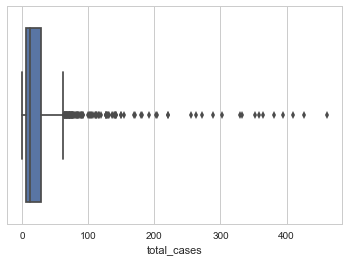

In [7]:
### Verifying Summary of the total cases
print(data.total_cases.describe())
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["total_cases"])

- We can see that total cases of Dengue per Week have mean value of 24.6, max value as 461 and min value as 0 , From this data we can see that this distribution is highly skewed

### Function to display Yearly Pattern of total cases for the given city and Year


In [8]:
def func(city, year, ylim = (0,400)):
    data = dengue_labels_train[dengue_labels_train['city'] == city][dengue_labels_train['year'] == year]
    data.plot.bar('weekofyear', 'total_cases', legend=False, ylim = ylim,figsize=(75,25),title="Yearly Pattern for each week of the year",
                  fontsize=50)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


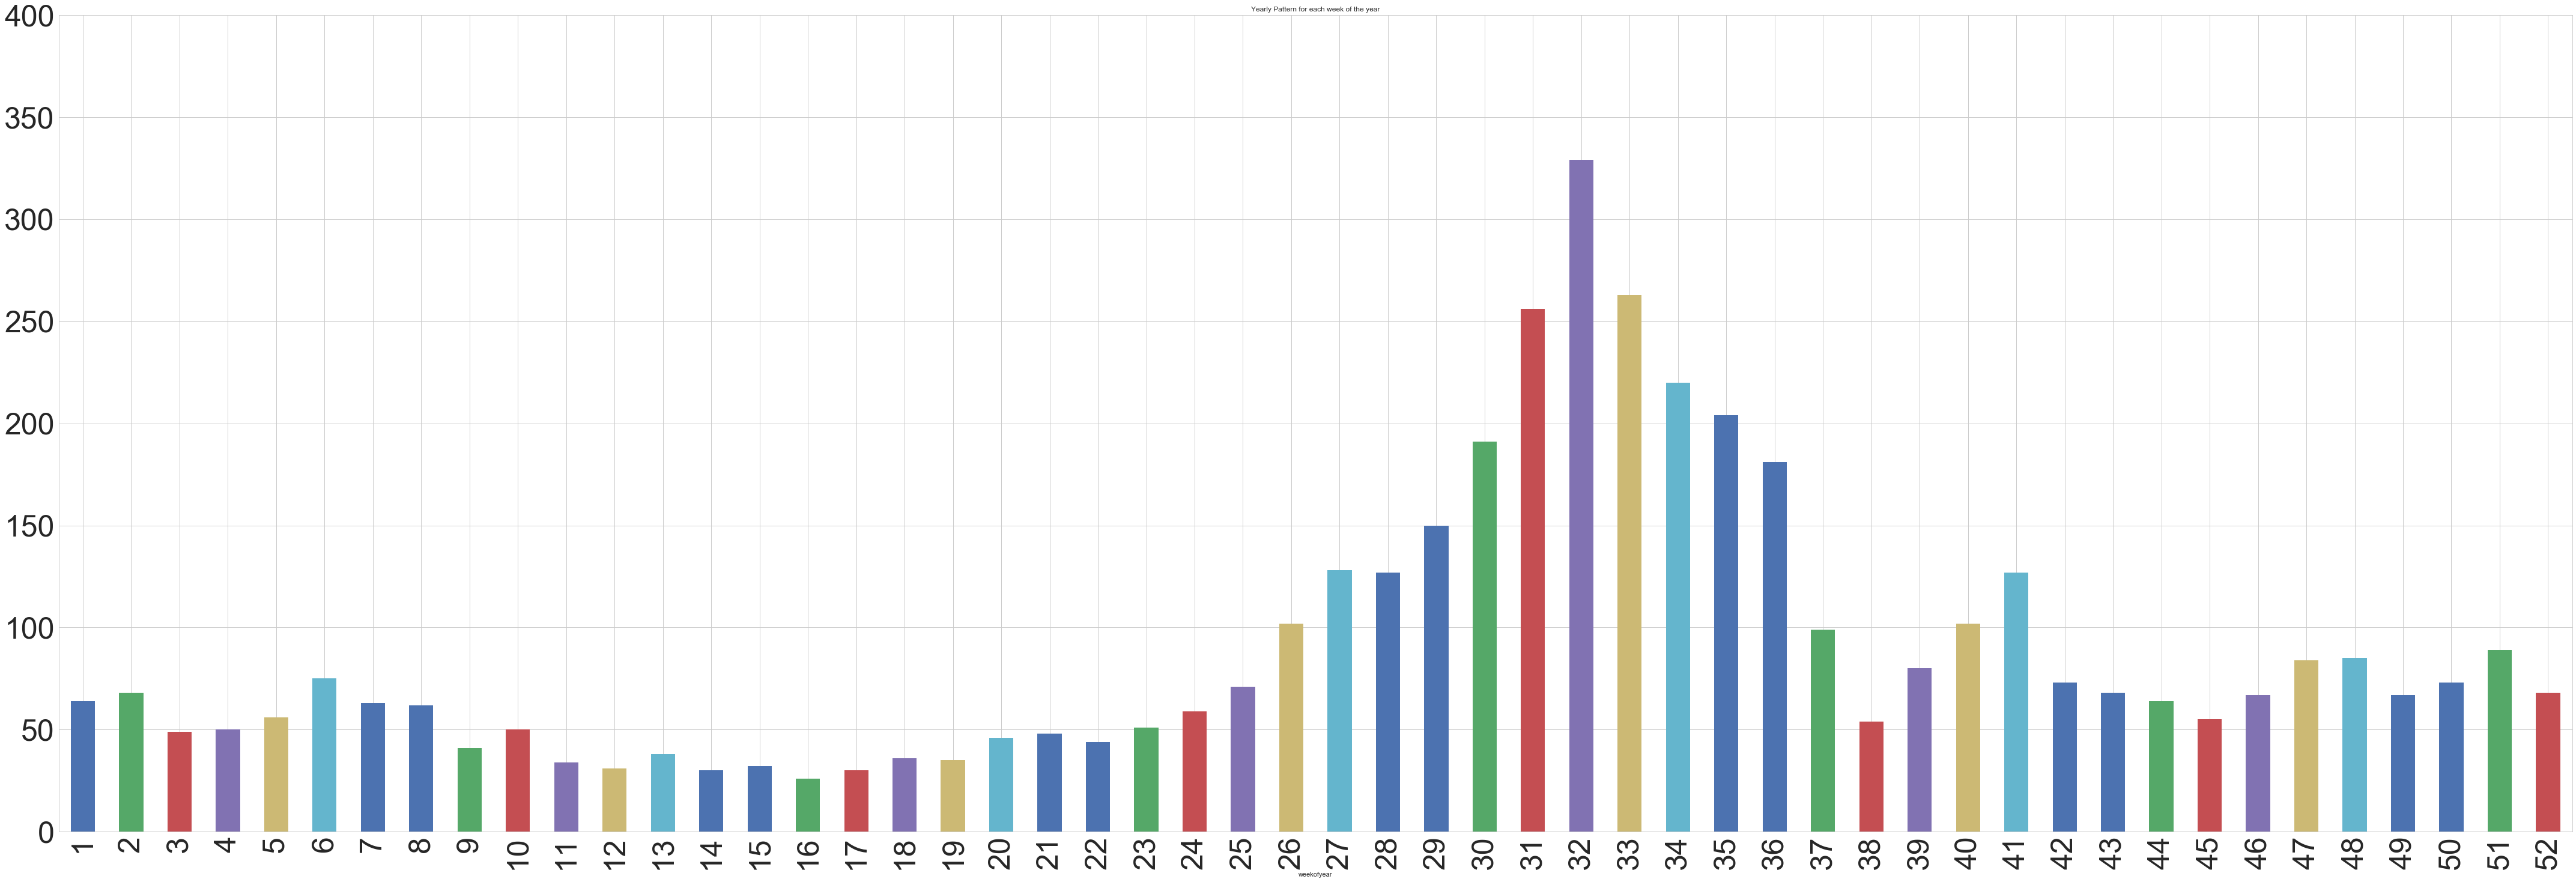

In [9]:
func('sj', 1998)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


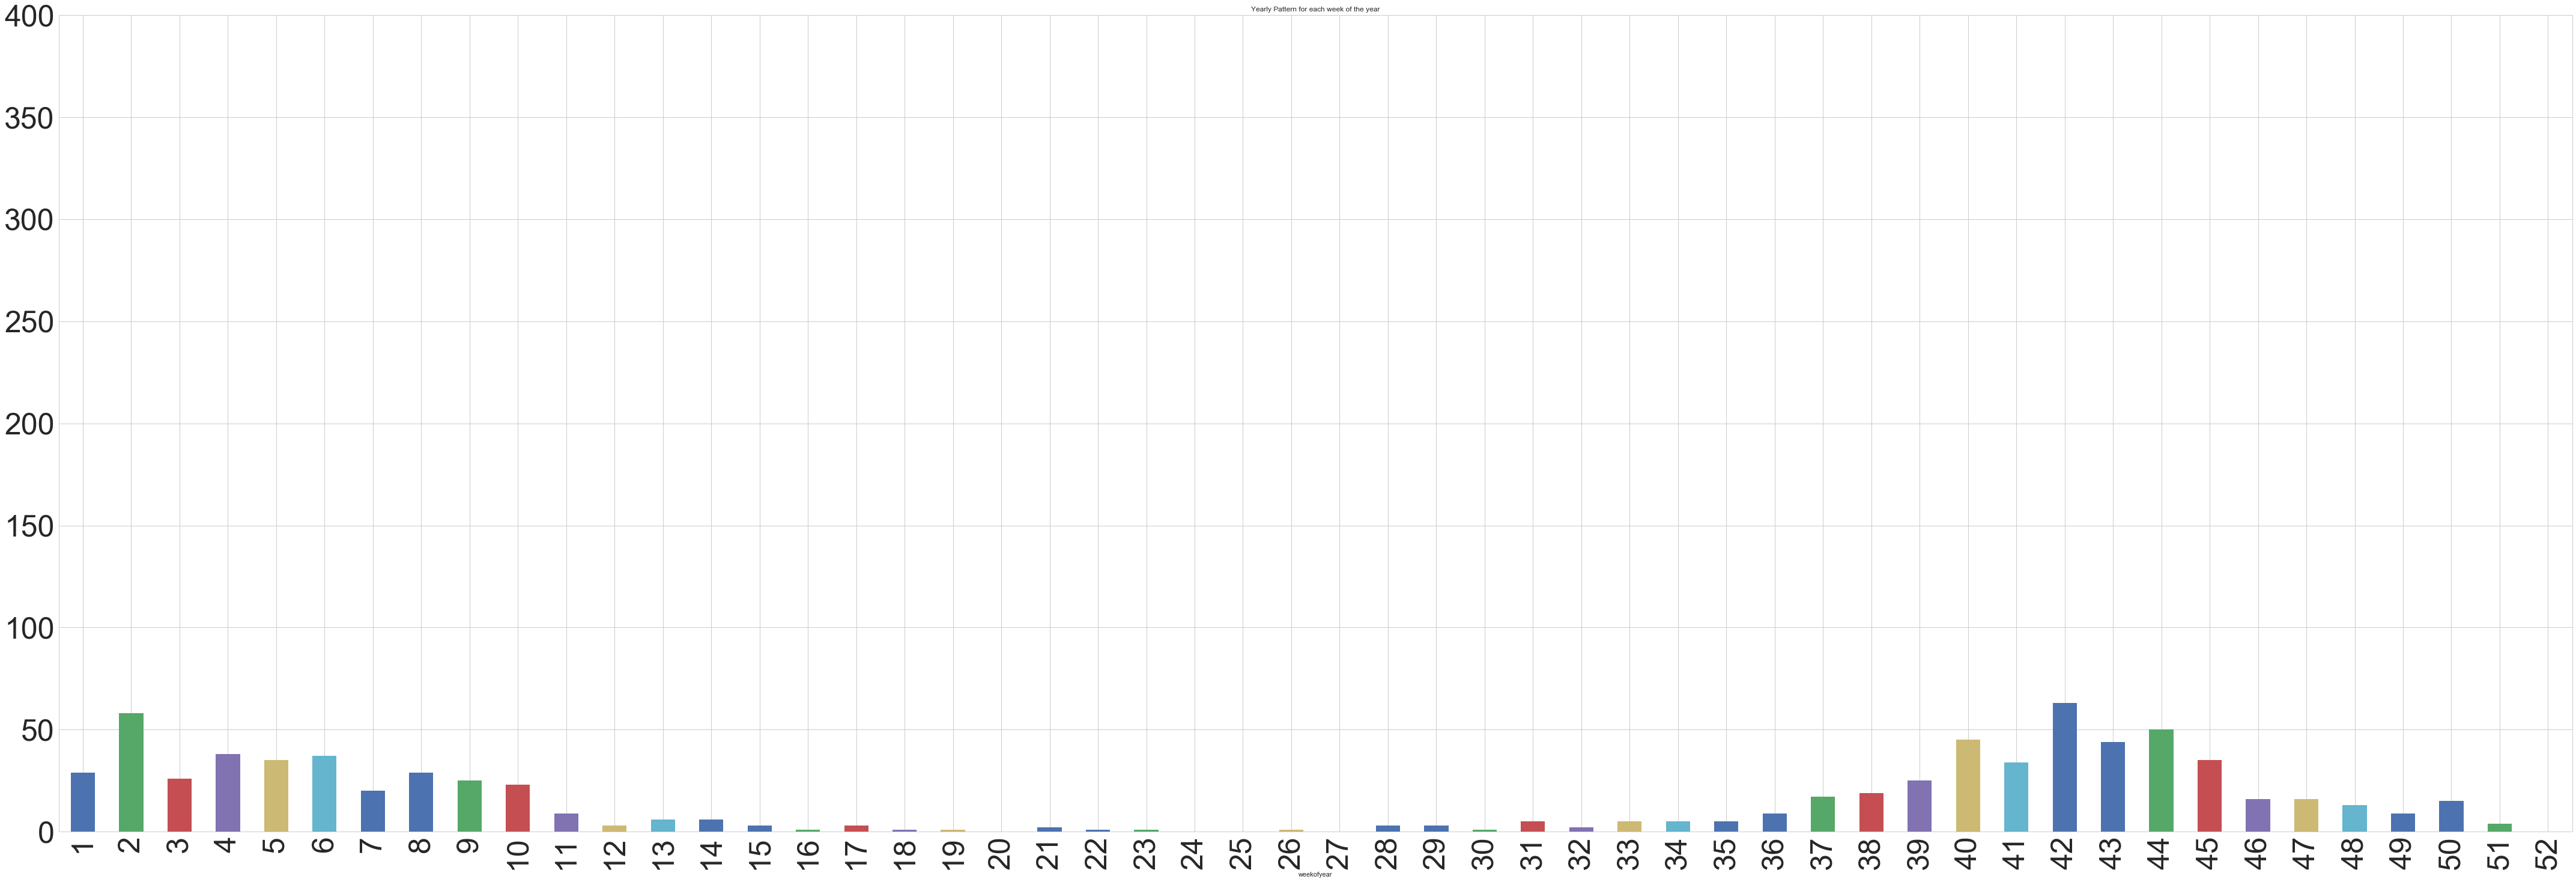

In [10]:
func('iq', 2008)

### Dividing the data according to cities, splitting train and test data and verifying the total cases summary as per cities

In [11]:
sj_X=data[data.city=="sj"]
iq_X=data[data.city=="iq"]
test_size = 0.25
seed = 7
sj_X_train, sj_X_test = train_test_split(sj_X, test_size=test_size, random_state=seed)
iq_X_train, iq_X_test = train_test_split(iq_X, test_size=test_size, random_state=seed)

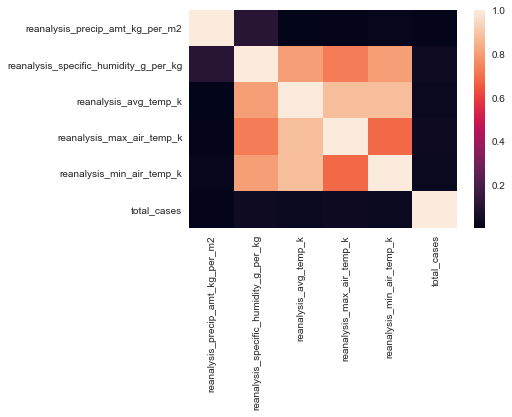

In [12]:
sns.heatmap(sj_X.corr()**2)

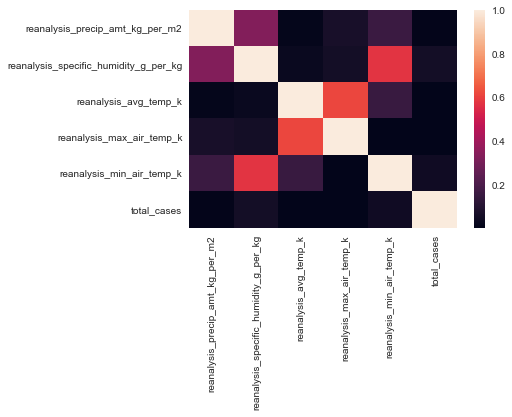

In [13]:
sns.heatmap(iq_X.corr()**2)

### Correlation plot conclusions:
- Squared all of the correlation values because We aren not caring about positive or negative correlations,just         strength of the correlation
- We can see that total Cases does not correlate to any specific feature individually in both cities.
- The temperature variables (reanalysis_avg_temp_k,reanalysis_min_air_temp_k ,reanalysis_max_air_temp_k)and humidity     are  correlated in San Juan, but not in Iquitos.

###  Let's see the total cases effected for sanjuan city

count    702.000000
mean      35.249288
std       52.894417
min        0.000000
25%        9.000000
50%       20.000000
75%       38.000000
max      426.000000
Name: total_cases, dtype: float64


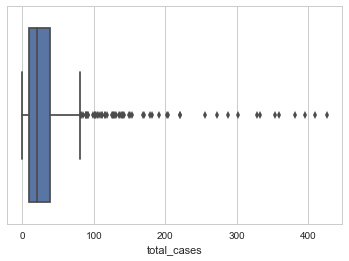

In [14]:
print(sj_X_train.total_cases.describe())
sns.set(style="whitegrid")
ax = sns.boxplot(x=sj_X_train["total_cases"])

#### We can see that there are so many outliers and mean of the data is 35.24 for train data and median of the data is having 20 cases of sanjuan city 

count    390.000000
mean       8.087179
std       11.745265
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64


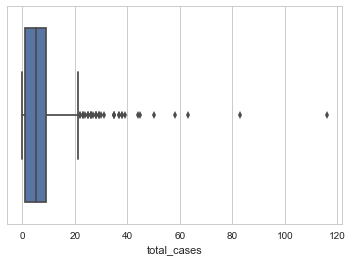

In [15]:
print(iq_X_train.total_cases.describe())
sns.set(style="whitegrid")
ax = sns.boxplot(x=iq_X_train["total_cases"])

### For iquitos, we can see that total cases are very low when compared to sanjuan city and mean is 8 cases median of the cases is 5.

### Here target i.e y is total cases so, we divide the data as (X,y) for both cities and for both train and test data.

In [16]:
sj_Y_train = sj_X_train.total_cases
sj_Y_test = sj_X_test.total_cases

iq_Y_train = iq_X_train.total_cases
iq_Y_test = iq_X_test.total_cases



In [17]:
sj_X_train = sj_X_train[sj_X_train.columns[1:8]]
iq_X_train = iq_X_train[iq_X_train.columns[1:8]]

sj_X_test=  sj_X_test[sj_X_test.columns[1:8]]
iq_X_test = iq_X_test[iq_X_test.columns[1:8]]


### Standardizing the data

In [18]:

scaler = StandardScaler()
sj_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(sj_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])
iq_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(iq_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])
sj_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(sj_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])
iq_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(iq_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])

### Baseline Models:
- Let us see the performance when we predict the number of cases for any given week to be equal to the mean number of cases in the past

In [19]:
## Sanjuan City
y_random_sj = np.full(len(sj_Y_test), np.mean(sj_Y_train))
mean_absolute_error(pd.Series(sj_Y_test), y_random_sj)

26.51032459152118

In [20]:
## Iquitos City
y_random_iq = np.full(len(iq_Y_test), np.mean(iq_Y_train))
mean_absolute_error(pd.Series(iq_Y_test), y_random_iq)

5.59542406311637

### linear regression implementation from scikit learn (Baseline Model)

In [21]:
### Sanjuan city
lr = LinearRegression()
lr.fit(sj_X_train, sj_Y_train)
Y_pred_sj = lr.predict(sj_X_test)
mean_absolute_error(sj_Y_test, Y_pred_sj)

24.78257784347613

In [22]:
### Iquitos City
lr.fit(iq_X_train, iq_Y_train)
Y_pred_iq = lr.predict(iq_X_test)
mean_absolute_error(iq_Y_test, Y_pred_iq)

5.497759451172942

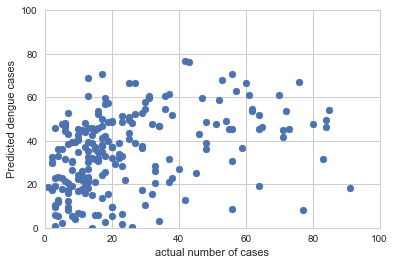

In [23]:
plt.scatter(sj_Y_test, Y_pred_sj)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("actual number of cases")
plt.ylabel("Predicted dengue cases")
plt.show()

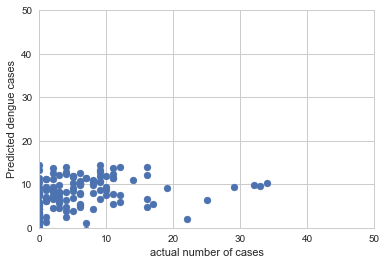

In [24]:
plt.scatter(iq_Y_test, Y_pred_iq)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("actual number of cases")
plt.ylabel("Predicted dengue cases")
plt.show()

In [25]:
### L1 regularization

clf = linear_model.Lasso(alpha=0.5)
clf.fit(sj_X_train, sj_Y_train)
Y_pred_sj_L1 = clf.predict(sj_X_test)
mean_absolute_error(sj_Y_test, Y_pred_sj_L1)

24.459668059963025

In [26]:
### L2 regularization
clf = linear_model.Ridge(alpha = 4)
clf.fit(sj_X_train, sj_Y_train)
Y_pred_sj_L2 = clf.predict(sj_X_test)
mean_absolute_error(sj_Y_test, Y_pred_sj_L2)

24.740810884928248

### From the graph we can see there is no linear relationship between the actual and predicted values and also from mean square error there is no improvement than random model.Introducing Regularization parameters also did not change mean absolute error, So we will focus on other models.

## Negative Binomial Regression

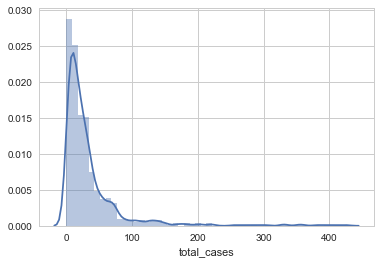

In [27]:
sns.distplot(sj_Y_train)
plt.show()

### Evaluation metric

- We selected Negative binomial regression because it is used to model count data for which the variance is higher than the mean and mainly used for skew distribution.From the graph, we can see that data is highly skewed distributed,It makes a convince to use negative binomial regression.
- Evaluation metric we are using here is mean absolute error. It is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.Less error , better the model.We calculated MAE using baseline models such as random model and Linear Regression Model. Our aim is to get less mean absolute error(MAE) than baseline models

### Modelling for sanjuan city and tuning alpha parameter

In [28]:
formula1 = ' + '.join([str(i) for i in list(sj_X_train.columns)])
formula1 = 'y ~ ' + formula1

train_sj = sj_X_train.copy()
train_sj['y'] = sj_Y_train
test_sj = sj_X_test.copy()
alpha=[0.01,0.05,1,1.5,2]
for i in alpha:
    model1 = smf.glm(formula=formula1,
                data=train_sj,
                family=sm.families.NegativeBinomial(alpha=i))
    model1 = model1.fit()
    #model1.summary()
    predictions_sj = model1.predict(test_sj).astype(int)
    print ("test error for alpha =",i,"is", mean_absolute_error(predictions_sj, sj_Y_test))
    pred_train_sj = model1.predict(train_sj).astype(int)
    print ("train error for alpha =",i,"is",mean_absolute_error(pred_train_sj, sj_Y_train))

test error for alpha = 0.01 is 14.478632478632479
train error for alpha = 0.01 is 15.354700854700855
test error for alpha = 0.05 is 14.5
train error for alpha = 0.05 is 15.78062678062678
test error for alpha = 1 is 14.914529914529915
train error for alpha = 1 is 16.343304843304843
test error for alpha = 1.5 is 14.957264957264957
train error for alpha = 1.5 is 16.391737891737893
test error for alpha = 2 is 14.974358974358974
train error for alpha = 2 is 16.400284900284902


- Alpha lies between 0 and 2 for negative Binomial regression and default is 1, by changing alpha parameter, we don't see much change in mean absolute errors adding  link parameters also not effective.

### Modelling for iquitos city and tuning alpha parameter

In [29]:
formula2 = ' + '.join([str(i) for i in list(iq_X_train.columns)])
formula2 = 'y ~ ' + formula2

train_iq = iq_X_train.copy()
train_iq['y'] = iq_Y_train
test_iq = iq_X_test.copy()

alpha=[0.01,0.05,1,1.5,2]
for i in alpha :
    model2 = smf.glm(formula=formula2,
                data=train_iq,
                family=sm.families.NegativeBinomial(alpha=i))
    model2 = model2.fit()
#model2.summary()

    predictions_iq = model2.predict(test_iq).astype(int)
    print ("test error for alpha=", i,"is",mean_absolute_error(predictions_iq, iq_Y_test))

    pred_train_iq = model2.predict(train_iq).astype(int)
    print ("train error for alpha",i, "is",mean_absolute_error(pred_train_iq, iq_Y_train))

test error for alpha= 0.01 is 4.953846153846154
train error for alpha 0.01 is 4.223076923076923
test error for alpha= 0.05 is 4.8307692307692305
train error for alpha 0.05 is 4.2846153846153845
test error for alpha= 1 is 4.8538461538461535
train error for alpha 1 is 4.541025641025641
test error for alpha= 1.5 is 4.892307692307693
train error for alpha 1.5 is 4.574358974358974
test error for alpha= 2 is 4.938461538461539
train error for alpha 2 is 4.579487179487179


### Combined Modelling for both cities

In [30]:
pred = predictions_iq.append(predictions_sj)
true = iq_Y_test.append(sj_Y_test)
print ("test error:", mean_absolute_error(pred, true))

train_pred = pred_train_iq.append(pred_train_sj)
train_true = iq_Y_train.append(sj_Y_train)
print ("train error:", mean_absolute_error(train_pred, train_true))

test error: 11.39010989010989
train error: 12.178571428571429


In [31]:
train_pred[70:80], train_true[70:80]

(1182     5
 1035     9
 1262    10
 1084     1
 951      0
 1099     1
 1232     8
 982      0
 1022    20
 973      0
 dtype: int64, 1182     9
 1035    13
 1262     2
 1084     1
 951      1
 1099     0
 1232     8
 982      1
 1022     7
 973      0
 Name: total_cases, dtype: int64)

In [32]:
np.mean(train_pred)


24.67765567765568

In [33]:
np.mean(train_true)

25.5485347985348

In [34]:
np.mean(abs(train_true - np.mean(train_true)))

23.985557635282877

### Conclusion

- When Compared to Baseline Model's Mean Absolute errors, Negative Binominal Regression MAE is low and performance is better.

### Links Reference:

http://www.mathematica-journal.com/2013/06/negative-binomial-regression/

### Below is the trial method using keras( Don't consider this). Our final conclusion model is Negative Binomial Regression

### Regression Using Keras
- we try to do with keras but we are getting nan values.

In this section we will create a neural network model for the calculating the total Dengue problem.

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import random
from keras import optimizers
import matplotlib.pyplot as plt
import keras as K

We try to play with the baseline Keras Model by Changing the learning rate,  kernel regularizer,activation function, but still sometime getting the train loss as nan. 

In [40]:
X = sj_X_train.copy()
Y = sj_Y_train.copy()

scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(Y.reshape(len(X),1))
X = scalarX.transform(X)
Y = scalarY.transform(Y.reshape(len(X),1))

model = Sequential()
model.add(Dense(50, input_dim=7, kernel_initializer= "normal" ,kernel_regularizer= 'l2', activation='elu'))
model.add(Dense(40,  activation='elu', kernel_regularizer= 'l2'))
model.add(Dense(20,  activation='elu', kernel_regularizer= 'l2'))
model.add(Dense(1))


sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='poisson', optimizer=sgd, metrics=['mae'])
hist = model.fit(X, Y, epochs=40, batch_size=20,  verbose=1, validation_split=0.3)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Train on 491 samples, validate on 211 samples
Epoch 1/40
491/491 [==============================] - 0s 723us/step - loss: nan - mean_absolute_error: 1.2449 - val_loss: nan - val_mean_absolute_error: 2.8546
Epoch 2/40
491/491 [==============================] - 0s 84us/step - loss: nan - mean_absolute_error: 6.0937 - val_loss: nan - val_mean_absolute_error: 13.1200
Epoch 3/40
491/491 [==============================] - 0s 153us/step - loss: nan - mean_absolute_error: 126.4108 - val_loss: nan - val_mean_absolute_error: 1699.0258
Epoch 4/40
491/491 [==============================] - 0s 102us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/40
491/491 [==============================] - 0s 109us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/40
491/491 [==============================] - 0s 118us/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7

Plot for Train Loss and Validation Loss

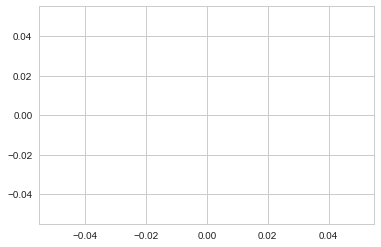

In [37]:
loss_values = hist.history['loss']
val_loss =  hist.history['val_loss']

plt.plot(loss_values)
plt.plot(val_loss)
plt.show()

In [38]:
y_test = model.predict(sj_X_test)